In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import tensorflow as tf
import keras

In [60]:
## 1. 데이터 저장

In [61]:
samsung = pd.read_csv('/content/drive/MyDrive/fly_ai/tensorflow/005930.KS.csv')

In [62]:
df = samsung.copy()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4449.710938,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4063.728760,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4092.857910,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4034.598877,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4202.101563,46880000


In [63]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df.head()

,date,open,high,low,close,adj_close,volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4449.710938,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4063.728760,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4092.857910,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4034.598877,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4202.101563,46880000


In [64]:
## 2. 데이터 확인

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6140 entries, 0 to 6139
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       6140 non-null   object 
 1   open       6140 non-null   float64
 2   high       6140 non-null   float64
 3   low        6140 non-null   float64
 4   close      6140 non-null   float64
 5   adj_close  6140 non-null   float64
 6   volume     6140 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 335.9+ KB


In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,6140.0,2.848076e+04,2.269316e+04,2540.000000,1.072000e+04,2.125000e+04,4.575000e+04,90300.0
high,6140.0,2.875581e+04,2.286959e+04,2760.000000,1.090000e+04,2.149000e+04,4.618500e+04,96800.0
low,6140.0,2.819435e+04,2.249832e+04,2420.000000,1.057500e+04,2.100000e+04,4.525000e+04,89500.0
close,6140.0,2.847089e+04,2.267169e+04,2730.000000,1.074000e+04,2.126000e+04,4.570000e+04,91000.0
adj_close,6140.0,2.462311e+04,2.216919e+04,1988.168579,7.915906e+03,1.644601e+04,3.910023e+04,85300.0
volume,6140.0,2.116503e+07,1.504670e+07,0.000000,1.169729e+07,1.715452e+07,2.617382e+07,164215000.0


In [67]:
df[df['volume'] == 0] #결측치 확인

,date,open,high,low,close,adj_close,volume
23,2000-02-04,5130.0,5130.0,5130.0,5130.0,3736.008545,0
41,2000-03-01,5120.0,5120.0,5120.0,5120.0,3728.725098,0
66,2000-04-05,6800.0,6800.0,6800.0,6800.0,4952.213867,0
72,2000-04-13,6910.0,6910.0,6910.0,6910.0,5032.323730,0
84,2000-05-01,6000.0,6000.0,6000.0,6000.0,4369.602051,0
...,...,...,...,...,...,...,...
5564,2022-02-28,71900.0,71900.0,71900.0,71900.0,68423.648438,0
5567,2022-03-04,72900.0,72900.0,72900.0,72900.0,69375.296875,0
5570,2022-03-10,69500.0,69500.0,69500.0,69500.0,66139.687500,0
5573,2022-03-15,70200.0,70200.0,70200.0,70200.0,66805.835938,0


In [68]:
df.loc[df['volume'] == 0, 'volume'] = np.nan # 싹 다 nan 처리

In [69]:
df.isna().sum()

,0
date,0
open,0
high,0
low,0
close,0
adj_close,0
volume,127


In [70]:
df = df.dropna()

In [71]:
df.isna().sum()

,0
date,0
open,0
high,0
low,0
close,0
adj_close,0
volume,0


In [72]:
df['date'] = pd.to_datetime(df['date']) # 날짜 타입으로 변경
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6013 entries, 0 to 6139
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       6013 non-null   datetime64[ns]
 1   open       6013 non-null   float64       
 2   high       6013 non-null   float64       
 3   low        6013 non-null   float64       
 4   close      6013 non-null   float64       
 5   adj_close  6013 non-null   float64       
 6   volume     6013 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 375.8 KB


In [73]:
df.head()

,date,open,high,low,close,adj_close,volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4449.710938,74195000.0
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4063.728760,74680000.0
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4092.857910,54390000.0
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4034.598877,40305000.0
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4202.101563,46880000.0


In [74]:
df = df.set_index('date') # 날짜를 인덱스로 설정

In [75]:
df.head()

,open,high,low,close,adj_close,volume
date,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4449.710938,74195000.0
2000-01-05,5800.0,6060.0,5520.0,5580.0,4063.728760,74680000.0
2000-01-06,5750.0,5780.0,5580.0,5620.0,4092.857910,54390000.0
2000-01-07,5560.0,5670.0,5360.0,5540.0,4034.598877,40305000.0
2000-01-10,5600.0,5770.0,5580.0,5770.0,4202.101563,46880000.0


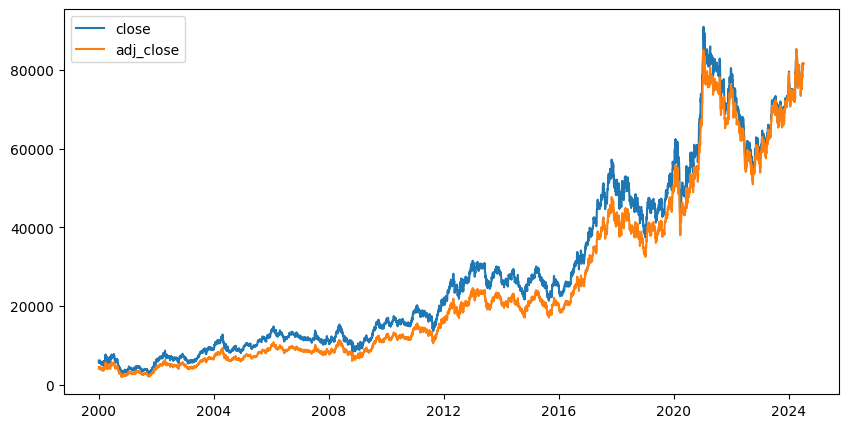

In [76]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['close'], label= 'close')
plt.plot(df.index, df['adj_close'], label= 'adj_close')
plt.legend()
plt.show()

In [77]:
df['ma3'] = np.round(df['close'].rolling(3).mean(), 0) # 세개씩 묶어서 평균을 내주는 녀석임
df.head()

,open,high,low,close,adj_close,volume,ma3
date,,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4449.710938,74195000.0,NaN
2000-01-05,5800.0,6060.0,5520.0,5580.0,4063.728760,74680000.0,NaN
2000-01-06,5750.0,5780.0,5580.0,5620.0,4092.857910,54390000.0,5770.0
2000-01-07,5560.0,5670.0,5360.0,5540.0,4034.598877,40305000.0,5580.0
2000-01-10,5600.0,5770.0,5580.0,5770.0,4202.101563,46880000.0,5643.0


In [78]:
df['ma5'] = np.round(df['close'].rolling(5).mean(), 0) # 다섯개씩 묶어서 평균
df.head()

,open,high,low,close,adj_close,volume,ma3,ma5
date,,,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4449.710938,74195000.0,NaN,NaN
2000-01-05,5800.0,6060.0,5520.0,5580.0,4063.728760,74680000.0,NaN,NaN
2000-01-06,5750.0,5780.0,5580.0,5620.0,4092.857910,54390000.0,5770.0,NaN
2000-01-07,5560.0,5670.0,5360.0,5540.0,4034.598877,40305000.0,5580.0,NaN
2000-01-10,5600.0,5770.0,5580.0,5770.0,4202.101563,46880000.0,5643.0,5724.0


In [79]:
df['mid'] = (df['low'] + df['high']) / 2 # 중간값도 추가, 수치 데이터가 부족하거나 새로운 열이 필요하다고 생각되면 추가해야 함.
df.head()

,open,high,low,close,adj_close,volume,ma3,ma5,mid
date,,,,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4449.710938,74195000.0,NaN,NaN,5885.0
2000-01-05,5800.0,6060.0,5520.0,5580.0,4063.728760,74680000.0,NaN,NaN,5790.0
2000-01-06,5750.0,5780.0,5580.0,5620.0,4092.857910,54390000.0,5770.0,NaN,5680.0
2000-01-07,5560.0,5670.0,5360.0,5540.0,4034.598877,40305000.0,5580.0,NaN,5515.0
2000-01-10,5600.0,5770.0,5580.0,5770.0,4202.101563,46880000.0,5643.0,5724.0,5675.0


In [80]:
df = df.dropna()
df.head()

,open,high,low,close,adj_close,volume,ma3,ma5,mid
date,,,,,,,,,
2000-01-10,5600.0,5770.0,5580.0,5770.0,4202.101563,46880000.0,5643.0,5724.0,5675.0
2000-01-11,5820.0,6100.0,5770.0,5770.0,4202.101563,59745000.0,5693.0,5656.0,5935.0
2000-01-12,5610.0,5740.0,5600.0,5720.0,4165.687012,29220000.0,5753.0,5684.0,5670.0
2000-01-13,5600.0,5740.0,5560.0,5710.0,4158.404297,41190000.0,5733.0,5702.0,5650.0
2000-01-14,5720.0,5880.0,5680.0,5830.0,4245.795410,49375000.0,5753.0,5760.0,5780.0


In [81]:
## 3. 학습, 테스트 데이터 분리

In [82]:
df.shape

(6009, 9)

In [83]:
idx = int(df.shape[0] * 0.8) # 6009 의 80퍼센트 정도임
idx

4807

In [84]:
train = df.iloc[:idx,:]
test = df.iloc[idx::]
train.shape, test.shape # 4807 : 1202

((4807, 9), (1202, 9))

In [85]:
### X, y 분리

In [86]:
train.head()

,open,high,low,close,adj_close,volume,ma3,ma5,mid
date,,,,,,,,,
2000-01-10,5600.0,5770.0,5580.0,5770.0,4202.101563,46880000.0,5643.0,5724.0,5675.0
2000-01-11,5820.0,6100.0,5770.0,5770.0,4202.101563,59745000.0,5693.0,5656.0,5935.0
2000-01-12,5610.0,5740.0,5600.0,5720.0,4165.687012,29220000.0,5753.0,5684.0,5670.0
2000-01-13,5600.0,5740.0,5560.0,5710.0,4158.404297,41190000.0,5733.0,5702.0,5650.0
2000-01-14,5720.0,5880.0,5680.0,5830.0,4245.795410,49375000.0,5753.0,5760.0,5780.0


In [87]:
X_train = train.drop(['close', 'adj_close'], axis= 1) # 두 파라미터를 버린다; adj_close 는 조정 종가임
y_train = train['close']

X_test = test.drop(['close', 'adj_close'], axis= 1) # 데이터 맞추기
y_test = test['close']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4807, 7), (4807,), (1202, 7), (1202,))

In [88]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X_train_s = ms.fit_transform(X_train) # 스케일링
y_train = y_train.to_numpy() # 넘파이로 변환

X_train_s.shape, y_train.shape

((4807, 7), (4807,))

In [89]:
### 타임 스텝 데이터 형태로 변형

In [90]:
def make_sequence_dataset(X, y, window_size):
  feature_list = []
  label_list = []

  for i in range(len(X) - window_size):
    feature_list.append(X[i:i+window_size])
    label_list.append(y[i+window_size])

  return np.array(feature_list), np.array(label_list)

In [91]:
# 20개씩 묶어서 그 다음 날짜를 계속해서 예측하면서 학습하는 방식이다
# 10개씩 묶을 거면 파라미터 수 조정하면 됨.
X_train_w, y_train_w = make_sequence_dataset(X_train_s, y_train, 20)
X_train_w.shape, y_train_w.shape

((4787, 20, 7), (4787,))

In [92]:
## 4. 모델

In [93]:
X_train_w.shape

(4787, 20, 7)

In [94]:
from keras import layers

model = keras.Sequential()
model.add(layers.LSTM(1024, activation= 'relu', input_shape=(X_train_w.shape[1], X_train_w.shape[2])))
# simpleRNN을 쓰면 기울기 소멸이 발생할 수 있으므로 LSTM을 사용
# 두겹 쌓으려면 return sequence를 true로
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [95]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 1024)                │       4,227,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │          16,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,243,489 (16.19 MB)

 Trainable params: 4,243,489 (16.19 MB)

 Non-trainable params: 0 (0.00 B)

In [96]:
model.compile(
    loss='mse',
    optimizer='adam', # sgd를 개선한 최적화 알고리즘
    metrics=['mse', 'mae'] # squared & absolute
)

In [97]:
epochs = 100
batch_size = 16

history = model.fit(
    X_train_w,
    y_train_w,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
)

Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 181757456.0000 - mae: 10842.8867 - mse: 181757456.0000 - val_loss: 295475968.0000 - val_mae: 13236.3613 - val_mse: 295475968.0000
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4229056.5000 - mae: 1468.4711 - mse: 4229056.5000 - val_loss: 210142704.0000 - val_mae: 11637.9600 - val_mse: 210142704.0000
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2348586.5000 - mae: 1145.8176 - mse: 2348586.5000 - val_loss: 21921504.0000 - val_mae: 3825.2683 - val_mse: 21921504.0000
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2940866.5000 - mae: 1284.4202 - mse: 2940866.5000 - val_loss: 64056660.0000 - val_mae: 6043.8442 - val_mse: 64056660.0000
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2613616.5000 - mae: 1200.6143 - mse: 2613616.5000 - val_loss: 35096056.0000 - val_mae: 4379.8086 - val_mse: 35096056.0000
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3244878.0000

In [98]:
history.history.keys()

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

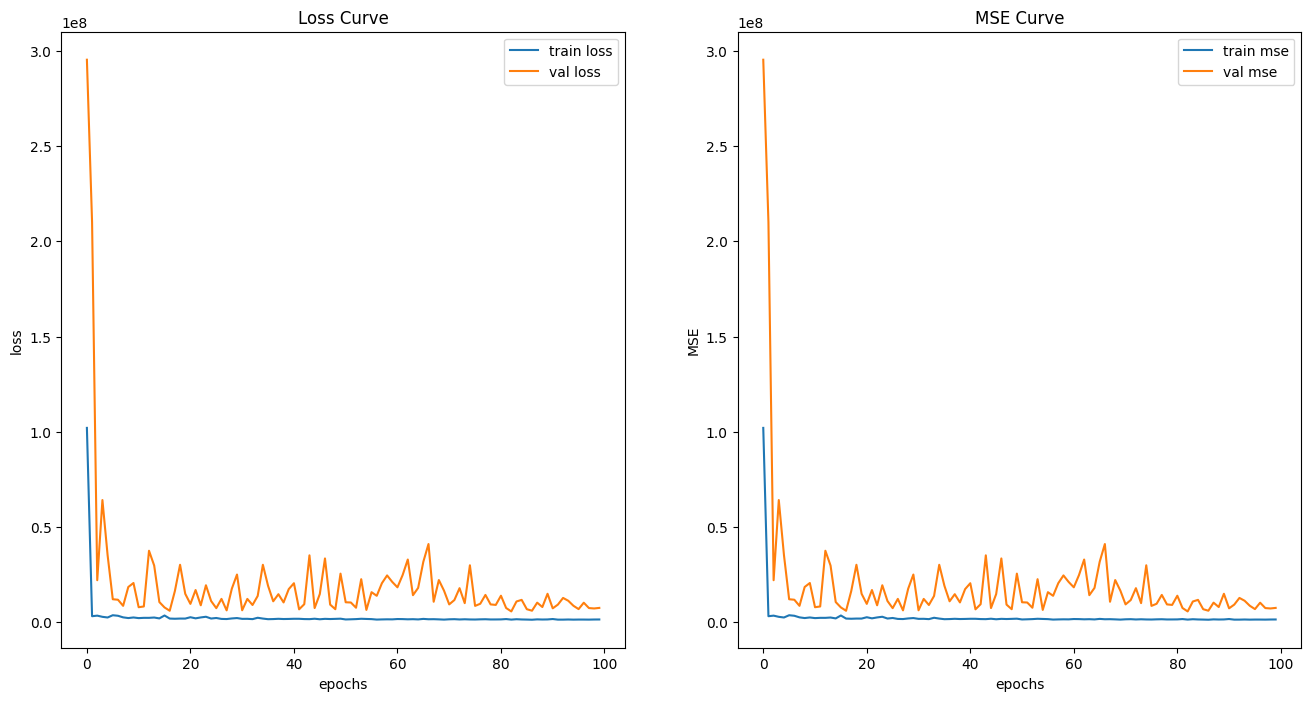

In [99]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('MSE')
    plt.plot(hist['epoch'], hist['mse'], label='train mse')
    plt.plot(hist['epoch'], hist['val_mse'], label='val mse')
    plt.title('MSE Curve')
    plt.legend()
    plt.show()

plot_history(history)

In [100]:
## 5. 평가

In [101]:
X_test = test.drop(['close', 'adj_close'], axis= 1)
y_test = test['close']

X_test.shape, y_test.shape

((1202, 7), (1202,))

In [102]:
X_test_s = ms.transform(X_test)

X_test_s.shape, y_test.shape

((1202, 7), (1202,))

In [103]:
X_test_w, y_test_w = make_sequence_dataset(X_test_s, y_test, 20)

X_test_w.shape, y_test_w.shape

<ipython-input-90-9a56962c0066>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_list.append(y[i+window_size])


((1182, 20, 7), (1182,))

In [104]:
y_pred = model.predict(X_test_w)
y_pred

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


array([[45475.312],
       [45217.51 ],
       [44859.23 ],
       ...,
       [66321.78 ],
       [66650.81 ],
       [66941.73 ]], dtype=float32)

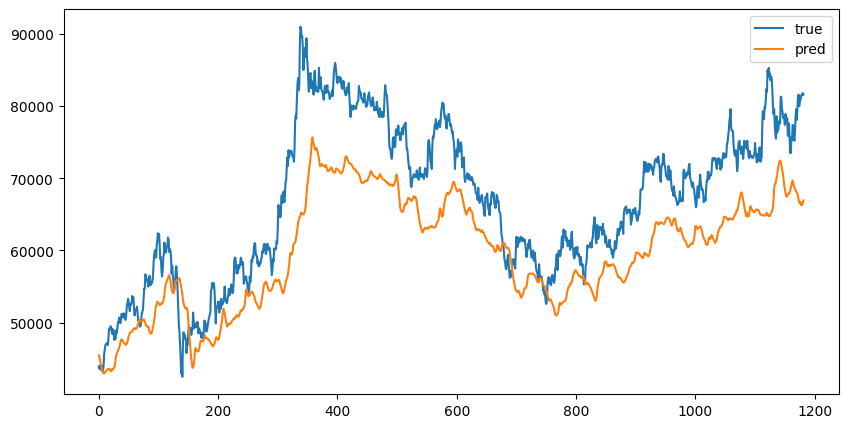

In [105]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_w, label='true')
plt.plot(y_pred, label='pred')
plt.legend()
plt.show()

In [106]:
# 입력이 2개인 모델; 원래는 서로 다른 특성을 쓰나, 지금은 같은 특성으로 사용한 후 합치기만 하였음.
# 인풋, 아웃풋은 맞춰줘야 함.

In [107]:
from re import X
# 첫번째 입력

input1 = layers.Input(shape=(X_train_w.shape[1], X_train_w.shape[2]))
x = layers.LSTM(64, activation='relu')(input1)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(132, activation='relu')(x)
output1 = layers.Dense(32, activation='relu')(x)

# 두번째 입력
input2 = layers.Input(shape=(X_train_w.shape[1], X_train_w.shape[2]))
x = layers.LSTM(64, activation='relu')(input2)
output2 = layers.Dense(32, activation='relu')(x)

In [108]:
merge = layers.Concatenate()([output1, output2])
output3 = layers.Dense(1)(merge)

model = keras.Model(inputs=[input1, input2], outputs=output3)

In [109]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [110]:
model.fit(
    [X_train_w, X_train_w], y_train_w,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2
)

Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 128722648.0000 - mse: 128722648.0000 - val_loss: 154506544.0000 - val_mse: 154506544.0000
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2123673.0000 - mse: 2123673.0000 - val_loss: 34034384.0000 - val_mse: 34034384.0000
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1789212.3750 - mse: 1789212.3750 - val_loss: 15375715.0000 - val_mse: 15375715.0000
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1750026.7500 - mse: 1750026.7500 - val_loss: 34451360.0000 - val_mse: 34451360.0000
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1914447.0000 - mse: 1914447.0000 - val_loss: 27250422.0000 - val_mse: 27250422.0000
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1908904.3750 - mse: 1908904.3750 - val_loss: 47720960.0000 - val_mse: 47720960.0000
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1400081.5000 - mse: 1400081.5000 - val_loss: 11134407.0000 - v

In [111]:
y_pred = model.predict([X_test_w, X_test_w])
y_pred

37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step


array([[46603.785],
       [46225.145],
       [45803.113],
       ...,
       [78610.12 ],
       [78897.91 ],
       [79468.32 ]], dtype=float32)

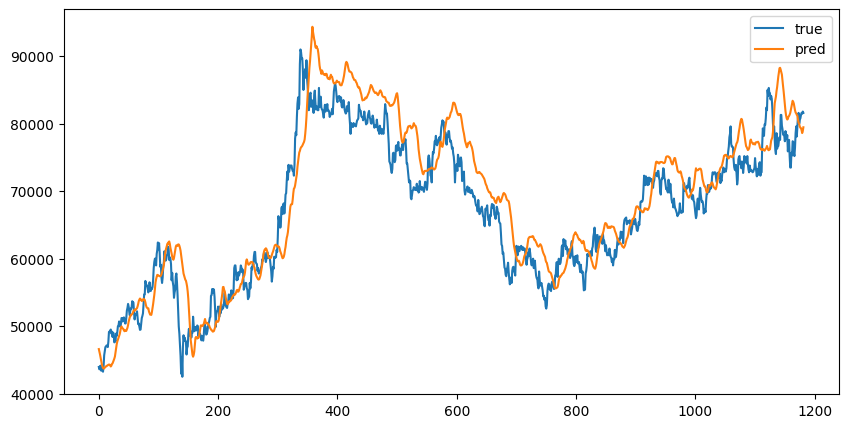

In [112]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_w, label='true')
plt.plot(y_pred, label='pred')
plt.legend()
plt.show()